## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#!pip install matplotlib

In [7]:
pd.set_option("max_colwidth",200)

In [8]:
df = pd.read_csv("data/train-balanced-sarcasm.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/train-balanced-sarcasm.csv'

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


2. Comprueba que está balanceado

In [8]:
df['label'].value_counts(normalize=True)

0    0.500018
1    0.499982
Name: label, dtype: float64

In [9]:
df[df['label']==1]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
33,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting,0,-1,-1,2016-11,2016-11-01 02:04:59,"The dumb thing is, they are risking their seller account, too."
44,1,"wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because ""muh republican party"" would be partisan as fuck",pb2crazy,politics,2,-1,-1,2016-11,2016-11-01 02:42:11,Clinton campaign accuses FBI of 'blatant double standard'
45,1,Ho ho ho... But Melania said that there is no way it could have happened because she didn't know the woman!,pb2crazy,politics,8,-1,-1,2016-10,2016-10-18 16:20:53,Anyone else think that it was interesting the way she mentioned that she had a tape recorder in her hand while he was assaulting her...
66,1,I can't wait until @potus starts a twitter war against Morning Joe.,kitduncan,politics,3,-1,-1,2016-11,2016-11-01 03:22:33,Here's what happens when Obama gives up his Twitter account
69,1,gotta love the teachers who give exams on the day after halloween,DEP61,CFBOffTopic,3,-1,-1,2016-11,2016-11-01 03:30:11,Monday night Drinking thread Brought to You by Infuriating capitalization Inconsistencies
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the technology to create a pig/bird/human hybrid virus.,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen, but there are reports that this virus has bits of human, pig and bird genetic material, which makes it uniquely interesting"
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,"In a move typical of their recent do-nothing approach to CO2 emissions, Canada appoints a tar sands executive to liaise with the US on climate change"
1010823,1,Perhaps this is an atheist conspiracy to make Christians look bad?,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church on Time
1010824,1,The Slavs got their own country - it is called Kosovo,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,"I've always been unsettled by that. I hear a lot of Jewish people say that Israel can do whatever it pleases because of the holocaust, but the Slavs, and other races the Germans attempted to annih..."


In [10]:
df['comment'] = df['comment'].str.replace('[^\w\s]', "")

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_11624\910373866.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment'] = df['comment'].str.replace('[^\w\s]', "")


In [11]:
df['comment'] = df['comment'].str.lower()

In [12]:
df[df['label']==1]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
33,1,but theyll have all those reviews,RoguishPoppet,ProductTesting,0,-1,-1,2016-11,2016-11-01 02:04:59,"The dumb thing is, they are risking their seller account, too."
44,1,wow it is totally unreasonable to assume that the agency that covered up bush war crimes because muh republican party would be partisan as fuck,pb2crazy,politics,2,-1,-1,2016-11,2016-11-01 02:42:11,Clinton campaign accuses FBI of 'blatant double standard'
45,1,ho ho ho but melania said that there is no way it could have happened because she didnt know the woman,pb2crazy,politics,8,-1,-1,2016-10,2016-10-18 16:20:53,Anyone else think that it was interesting the way she mentioned that she had a tape recorder in her hand while he was assaulting her...
66,1,i cant wait until potus starts a twitter war against morning joe,kitduncan,politics,3,-1,-1,2016-11,2016-11-01 03:22:33,Here's what happens when Obama gives up his Twitter account
69,1,gotta love the teachers who give exams on the day after halloween,DEP61,CFBOffTopic,3,-1,-1,2016-11,2016-11-01 03:30:11,Monday night Drinking thread Brought to You by Infuriating capitalization Inconsistencies
...,...,...,...,...,...,...,...,...,...,...
1010821,1,im sure that iran and n korea have the technology to create a pigbirdhuman hybrid virus,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen, but there are reports that this virus has bits of human, pig and bird genetic material, which makes it uniquely interesting"
1010822,1,whatever you do dont vote green,BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,"In a move typical of their recent do-nothing approach to CO2 emissions, Canada appoints a tar sands executive to liaise with the US on climate change"
1010823,1,perhaps this is an atheist conspiracy to make christians look bad,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church on Time
1010824,1,the slavs got their own country it is called kosovo,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,"I've always been unsettled by that. I hear a lot of Jewish people say that Israel can do whatever it pleases because of the holocaust, but the Slavs, and other races the Germans attempted to annih..."


3. Divide el dataset en train test. Qué forma tienen?

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(808618,)
(202155,)
(808618,)
(202155,)


## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm 

In [27]:
str(df[df['label']==0]['comment'])

'0                                                                                                                                             nc and nh\n1                                                                             you do know west teams play against west teams more than east teams right\n2                                 they were underdogs earlier today but since gronks announcement this afternoon the vegas line has moved to patriots 1\n3                                                                                              this meme isnt funny none of the new york nigga ones are\n4                                                                                                                        i could use one of those tools\n                                                                               ...                                                                     \n1010761    yeah its a ge p42dc a dieselelectric locomotive doesnt mean that the c

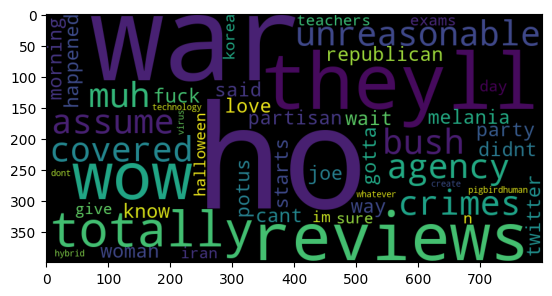

In [29]:
from wordcloud import WordCloud, STOPWORDS


wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(df[df['label']==1]['comment']))
plt.imshow(wordcloud)

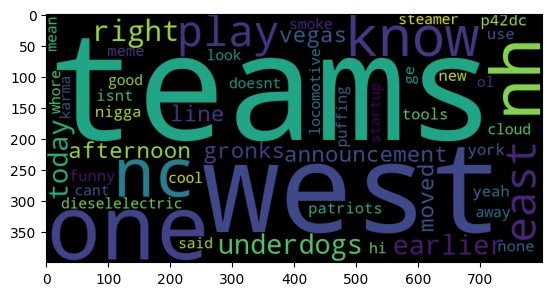

In [30]:
wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(df[df['label']==0]['comment']))
plt.imshow(wordcloud)

In [33]:
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

In [38]:
from collections import defaultdict
train1_df = df[df["label"]==1]
train0_df = df[df["label"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of not sarcastic comments", 
                                          "Frequent words of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [39]:
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of not sarcastic comments", 
                                          "Frequent words of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [40]:
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of not sarcastic comments", 
                                          "Frequent words of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,3), max_features=20000)
classifier = LogisticRegression(max_iter=10000)

In [43]:
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))


accuracy_score 0.6822190893126562
confusion_matrix
 [[73706 27188]
 [37053 64208]]


In [44]:
pipeline.predict(["Yeah sure"])

array([1], dtype=int64)

In [45]:
pipeline.predict_proba(["Yeah sure"])

array([[0.11830653, 0.88169347]])

In [47]:
pipeline.predict(["Welcome to Reddit"])

array([0], dtype=int64)

In [48]:
pipeline.predict_proba(["Welcome to Reddit"])

array([[0.64204467, 0.35795533]])

In [49]:
import eli5

In [50]:
eli5.show_weights(estimator=pipeline['classifier'],
                  feature_names = pipeline['vectorizer'].get_feature_names_out(),
                  top = 100)

Weight?,Feature
+6.073,obviously
+5.508,clearly
+5.448,totally
+4.688,gee
+4.658,duh
+4.561,bbut
+4.272,human eye
+4.230,yeah
+4.213,bbbut
+4.194,dare
